In [ ]:
import re
import os
import joblib
import kagglehub
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from datasets import load_dataset

In [2]:
path = kagglehub.dataset_download("cosmos98/twitter-and-reddit-sentimental-analysis-dataset")
print("Path to dataset files:", path)

dataset_path = os.path.join(path, "")
print("Dataset path:", dataset_path)

dataset_files = os.listdir(path)
print("Dataset files:", dataset_files)

reddit_df = pd.read_csv(os.path.join(dataset_path, "Reddit_Data.csv"))
twitter_df = pd.read_csv(os.path.join(dataset_path, "Twitter_Data.csv"))

Path to dataset files: C:\Users\adham\.cache\kagglehub\datasets\cosmos98\twitter-and-reddit-sentimental-analysis-dataset\versions\1
Dataset path: C:\Users\adham\.cache\kagglehub\datasets\cosmos98\twitter-and-reddit-sentimental-analysis-dataset\versions\1\
Dataset files: ['Reddit_Data.csv', 'Twitter_Data.csv']


In [3]:
reddit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [4]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [5]:
reddit_df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [6]:
twitter_df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [7]:
twitter_df = twitter_df.rename(columns={"clean_text": "text"})
reddit_df = reddit_df.rename(columns={"clean_comment": "text"})

twitter_df.drop(columns=["category"], inplace=True)
reddit_df.drop(columns=["category"], inplace=True)

In [8]:
reddit_df.head()

,text
0,family mormon have never tried explain them t...
1,buddhism has very much lot compatible with chr...
2,seriously don say thing first all they won get...
3,what you have learned yours and only yours wha...
4,for your own benefit you may want read living ...


In [9]:
twitter_df.head()

,text
0,when modi promised “minimum government maximum...
1,talk all the nonsense and continue all the dra...
2,what did just say vote for modi welcome bjp t...
3,asking his supporters prefix chowkidar their n...
4,answer who among these the most powerful world...


In [10]:
df1 = pd.concat([twitter_df, reddit_df], ignore_index=True)
df1.head()

,text
0,when modi promised “minimum government maximum...
1,talk all the nonsense and continue all the dra...
2,what did just say vote for modi welcome bjp t...
3,asking his supporters prefix chowkidar their n...
4,answer who among these the most powerful world...


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200229 entries, 0 to 200228
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    200125 non-null  object
dtypes: object(1)
memory usage: 1.5+ MB


In [12]:
df1['source'] = 0

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200229 entries, 0 to 200228
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    200125 non-null  object
 1   source  200229 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.1+ MB


In [14]:
df1.duplicated().sum()

np.int64(513)

In [15]:
df1 = df1.drop_duplicates()

In [16]:
df1.duplicated().sum()

np.int64(0)

In [17]:
df1 = df1.dropna()

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199715 entries, 0 to 200228
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    199715 non-null  object
 1   source  199715 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 4.6+ MB


In [19]:
df1.shape

(199715, 2)

In [20]:
hf_dataset = load_dataset("artem9k/ai-text-detection-pile", split="train")
df2 = hf_dataset.to_pandas()

In [21]:
df2.head()

,source,id,text
0,human,0,12 Years a Slave: An Analysis of the Film Essa...
1,human,1,20+ Social Media Post Ideas to Radically Simpl...
2,human,2,2022 Russian Invasion of Ukraine in Global Med...
3,human,3,533 U.S. 27 (2001) Kyllo v. United States: The...
4,human,4,A Charles Schwab Corporation Case Essay\n\nCha...


In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1392522 entries, 0 to 1392521
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   source  1392522 non-null  object
 1   id      1392522 non-null  int64 
 2   text    1392522 non-null  object
dtypes: int64(1), object(2)
memory usage: 31.9+ MB


In [23]:
df2.shape

(1392522, 3)

In [24]:
df2.duplicated().sum()

np.int64(0)

In [25]:
def filter_ai_generated(df):
    if 'source' not in df.columns:
        raise ValueError("The DataFrame must have a 'source' column.")
    
    df2 = df[df['source'] == 'ai'].copy()
    return df2

In [26]:
df2 = filter_ai_generated(df2)
df2.head()


,source,id,text
1028146,ai,1048108,\nSure! The process for setting up a hydroponi...
1028147,ai,1048109,The best type of wine to pair with steak depe...
1028148,ai,1048110,\n\nAnswer: To determine if an investment is a...
1028149,ai,1048111,\n\nSome financial advice is to always pay you...
1028150,ai,1048112,\nThe type of safety devices you should instal...


In [27]:
df2.shape

(364376, 3)

In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364376 entries, 1028146 to 1392521
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   source  364376 non-null  object
 1   id      364376 non-null  int64 
 2   text    364376 non-null  object
dtypes: int64(1), object(2)
memory usage: 11.1+ MB


In [29]:
df2= df2[:199715]

In [30]:
df2.shape

(199715, 3)

In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199715 entries, 1028146 to 1227860
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   source  199715 non-null  object
 1   id      199715 non-null  int64 
 2   text    199715 non-null  object
dtypes: int64(1), object(2)
memory usage: 6.1+ MB


In [32]:
df2 = df2.drop(columns=['id'])

In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199715 entries, 1028146 to 1227860
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   source  199715 non-null  object
 1   text    199715 non-null  object
dtypes: object(2)
memory usage: 4.6+ MB


In [34]:
df2['source'] = df2['source'].apply(lambda x: 1 if x == 'ai' else 0)

In [35]:
df2.head()

,source,text
1028146,1,\nSure! The process for setting up a hydroponi...
1028147,1,The best type of wine to pair with steak depe...
1028148,1,\n\nAnswer: To determine if an investment is a...
1028149,1,\n\nSome financial advice is to always pay you...
1028150,1,\nThe type of safety devices you should instal...


In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199715 entries, 1028146 to 1227860
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   source  199715 non-null  int64 
 1   text    199715 non-null  object
dtypes: int64(1), object(1)
memory usage: 4.6+ MB


In [37]:
df2.duplicated().sum()

np.int64(157)

In [38]:
df2.drop_duplicates(inplace=True)

In [39]:
df2.duplicated().sum()

np.int64(0)

In [40]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199715 entries, 0 to 200228
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    199715 non-null  object
 1   source  199715 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 4.6+ MB


In [41]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199558 entries, 1028146 to 1227860
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   source  199558 non-null  int64 
 1   text    199558 non-null  object
dtypes: int64(1), object(1)
memory usage: 4.6+ MB


In [42]:
df = pd.concat([df1, df2], ignore_index=True)
df.head()

,text,source
0,when modi promised “minimum government maximum...,0
1,talk all the nonsense and continue all the dra...,0
2,what did just say vote for modi welcome bjp t...,0
3,asking his supporters prefix chowkidar their n...,0
4,answer who among these the most powerful world...,0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399273 entries, 0 to 399272
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    399273 non-null  object
 1   source  399273 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 6.1+ MB


In [44]:
df['source'].unique()

array([0, 1])

In [45]:
df.duplicated().sum()

np.int64(0)

Preproccessing

<Axes: xlabel='source', ylabel='count'>

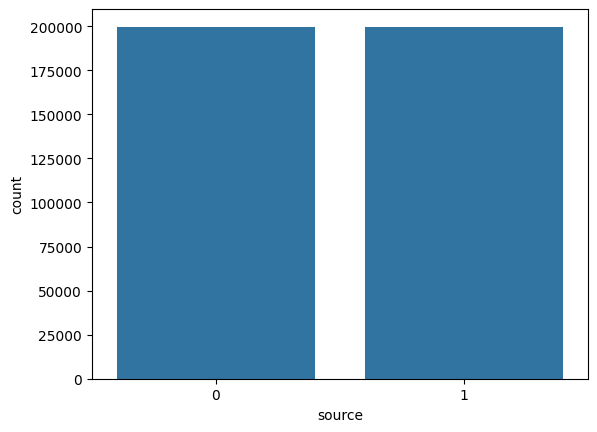

In [46]:
sns.countplot(data=df,x='source')

In [47]:
df['text'][0]

'when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples'

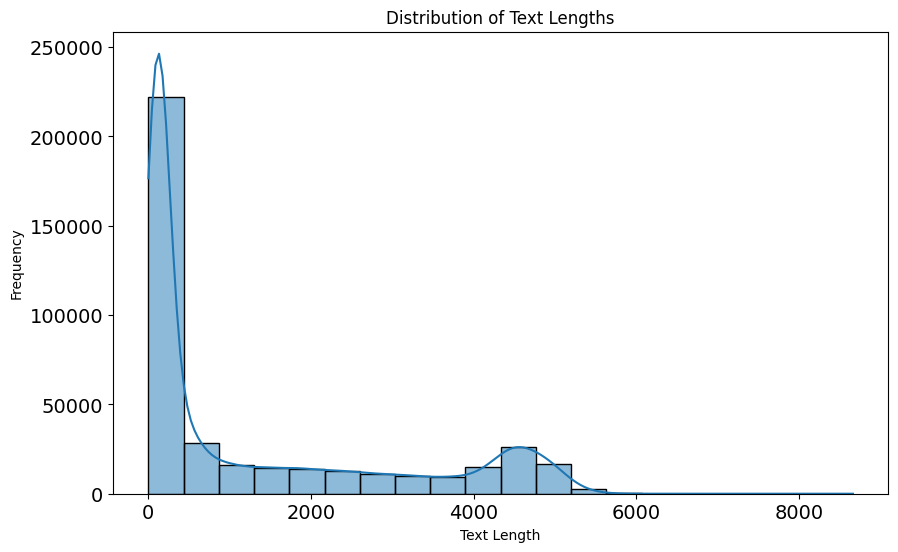

In [48]:
df['text_length'] = df['text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=20, kde=True)
plt.title("Distribution of Text Lengths")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [49]:
df['text_length'].describe()

count    399273.000000
mean       1309.158127
std        1675.484881
min           1.000000
25%         107.000000
50%         249.000000
75%        2305.000000
max        8665.000000
Name: text_length, dtype: float64

In [50]:
df = df.drop(columns=['text_length'])

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399273 entries, 0 to 399272
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    399273 non-null  object
 1   source  399273 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 6.1+ MB


In [52]:
df['text'][0]

'when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples'

In [53]:
def clean_text(text):
    cleaning_pattern = r'[^a-zA-Z\s]'

    clean_text = re.sub(cleaning_pattern, '', text)

    clean_text = clean_text.replace('\n', ' ')

    clean_text = re.sub(r'\s+', ' ', clean_text)

    return clean_text.strip()

In [54]:
df['text'] = df['text'].apply(clean_text)

In [55]:
df['text'] = df['text'].str.lower()

In [56]:
df['text'][0]

'when modi promised minimum government maximum governance expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples'

In [57]:
df.head()

,text,source
0,when modi promised minimum government maximum ...,0
1,talk all the nonsense and continue all the dra...,0
2,what did just say vote for modi welcome bjp to...,0
3,asking his supporters prefix chowkidar their n...,0
4,answer who among these the most powerful world...,0


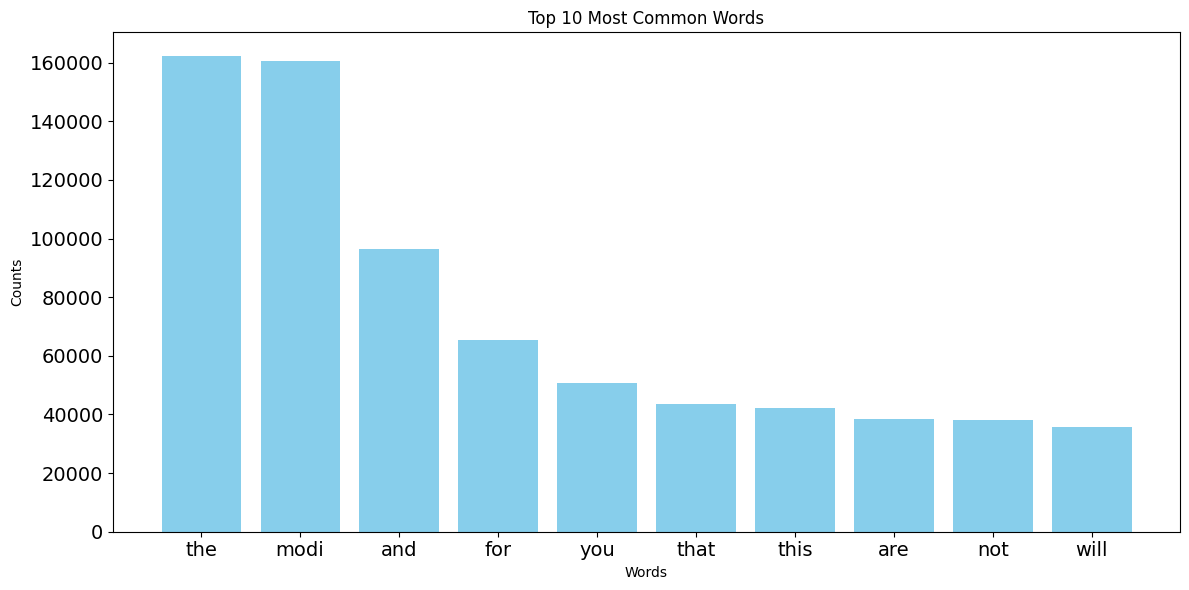

In [58]:
top_words = Counter(" ".join(df[df['source'] == 0]['text']).split()).most_common(10)

words, counts = zip(*top_words)

plt.figure(figsize=(12,6))
plt.bar(words, counts, color='skyblue')
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()


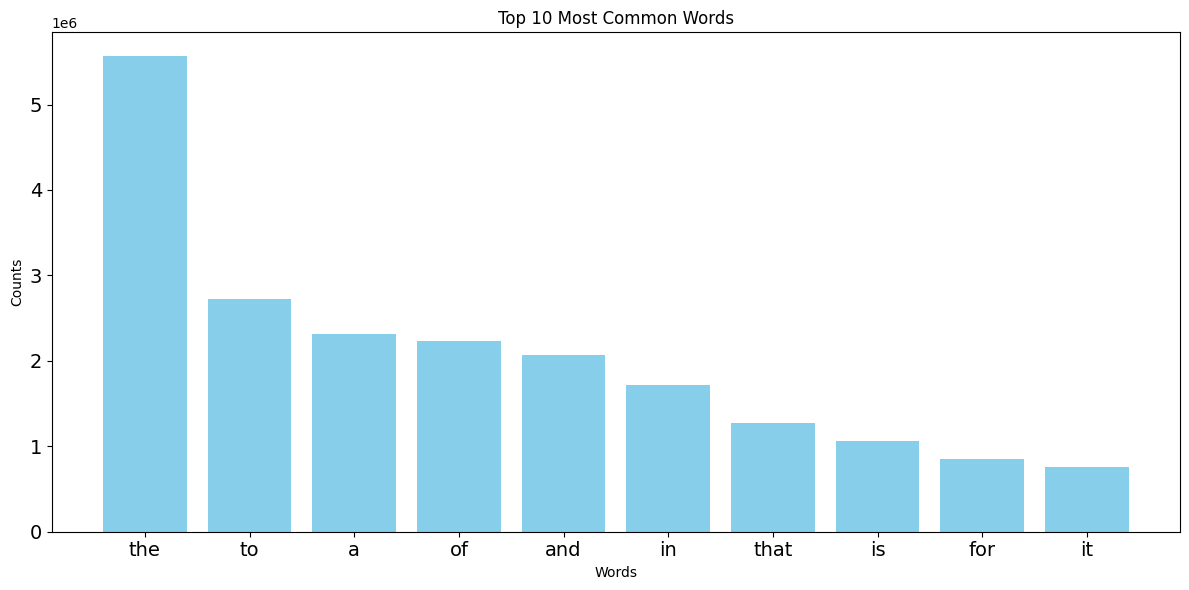

In [59]:
top_words = Counter(" ".join(df[df['source'] == 1]['text']).split()).most_common(10)

words, counts = zip(*top_words)

plt.figure(figsize=(12,6))
plt.bar(words, counts, color='skyblue')
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

In [60]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

df['tokenized_text'] = df['text'].apply(lambda x: word_tokenize(x))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [61]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return filtered_tokens

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [62]:
df['tokenized_text'] = df['tokenized_text'].apply(lambda x: remove_stopwords(x))

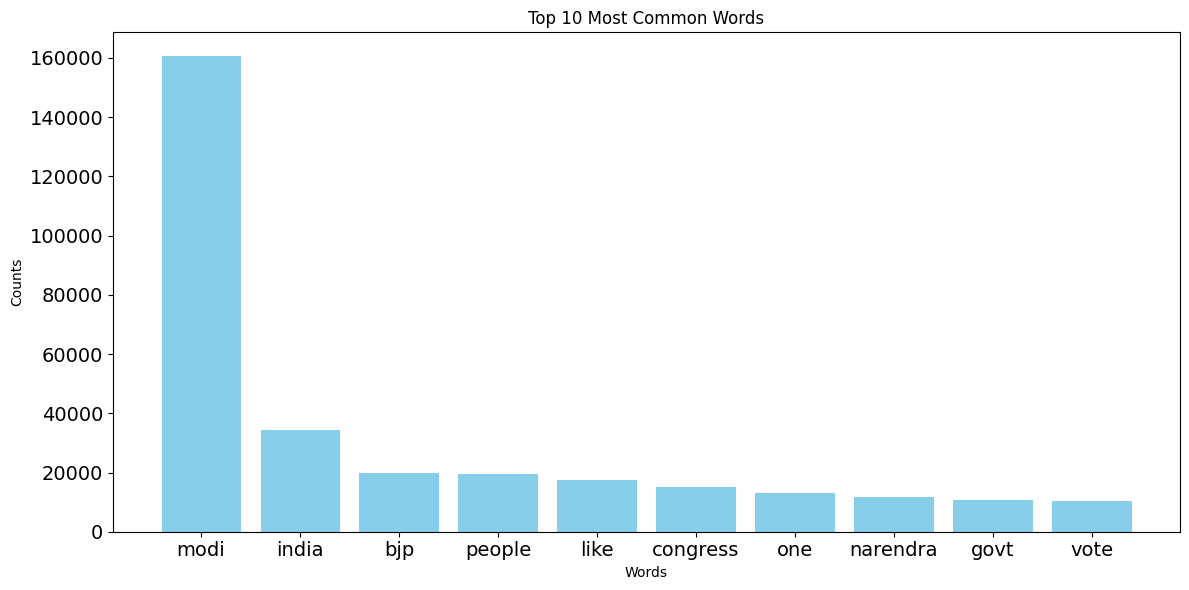

In [63]:
all_tokens = [token for tokens_list in df[df['source'] == 0]['tokenized_text'] for token in tokens_list]

top_words = Counter(all_tokens).most_common(10)

words, counts = zip(*top_words)

plt.figure(figsize=(12,6))
plt.bar(words, counts, color='skyblue')
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

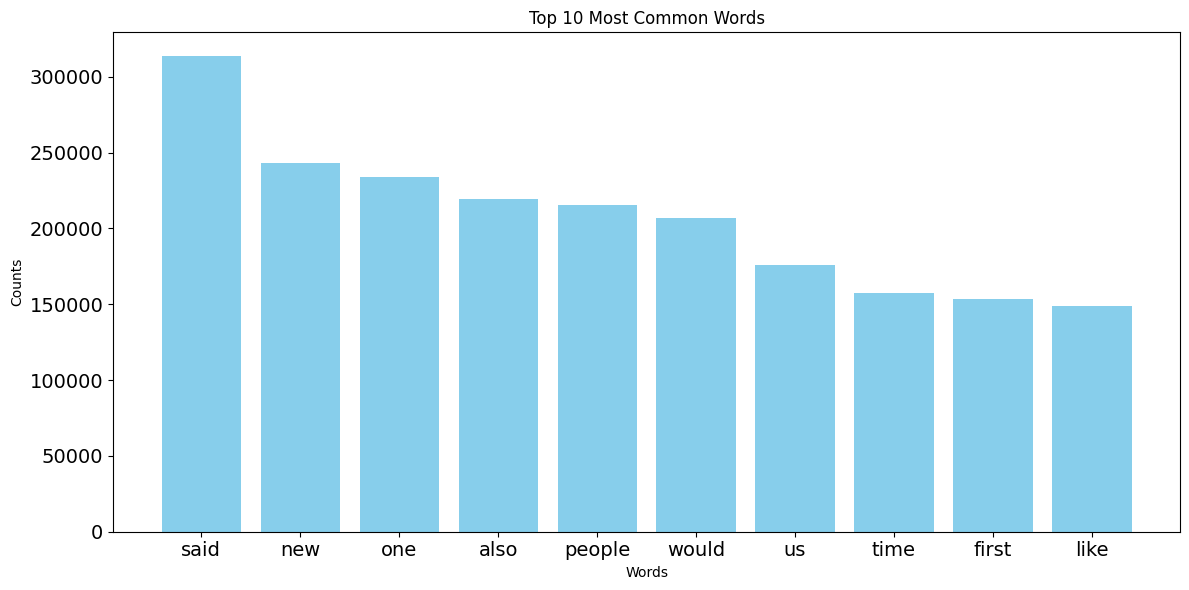

In [64]:
all_tokens = [token for tokens_list in df[df['source'] == 1]['tokenized_text'] for token in tokens_list]

top_words = Counter(all_tokens).most_common(10)

words, counts = zip(*top_words)

plt.figure(figsize=(12,6))
plt.bar(words, counts, color='skyblue')
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

In [65]:
df['tokenized_text'][0]

['modi',
 'promised',
 'minimum',
 'government',
 'maximum',
 'governance',
 'expected',
 'begin',
 'difficult',
 'job',
 'reforming',
 'state',
 'take',
 'years',
 'get',
 'justice',
 'state',
 'business',
 'exit',
 'psus',
 'temples']

In [66]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize_text(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return lemmatized_tokens

df['lemmatized_text'] = df['tokenized_text'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\adham\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


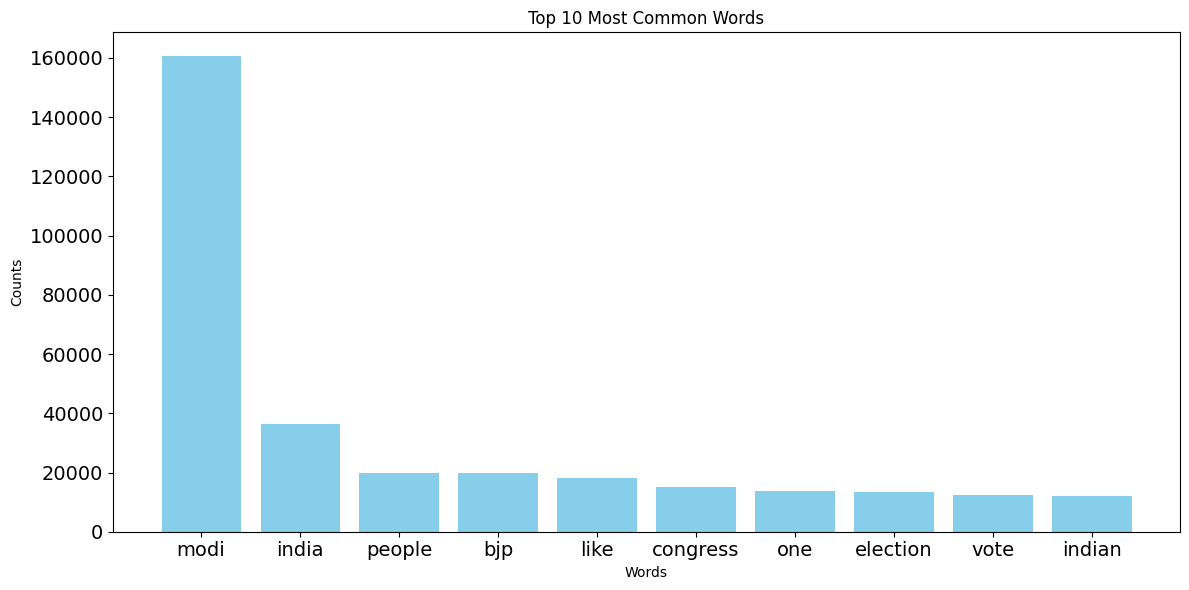

In [67]:
all_tokens = [token for tokens_list in df[df['source'] == 0]['lemmatized_text'] for token in tokens_list]

top_words = Counter(all_tokens).most_common(10)

words, counts = zip(*top_words)

plt.figure(figsize=(12,6))
plt.bar(words, counts, color='skyblue')
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

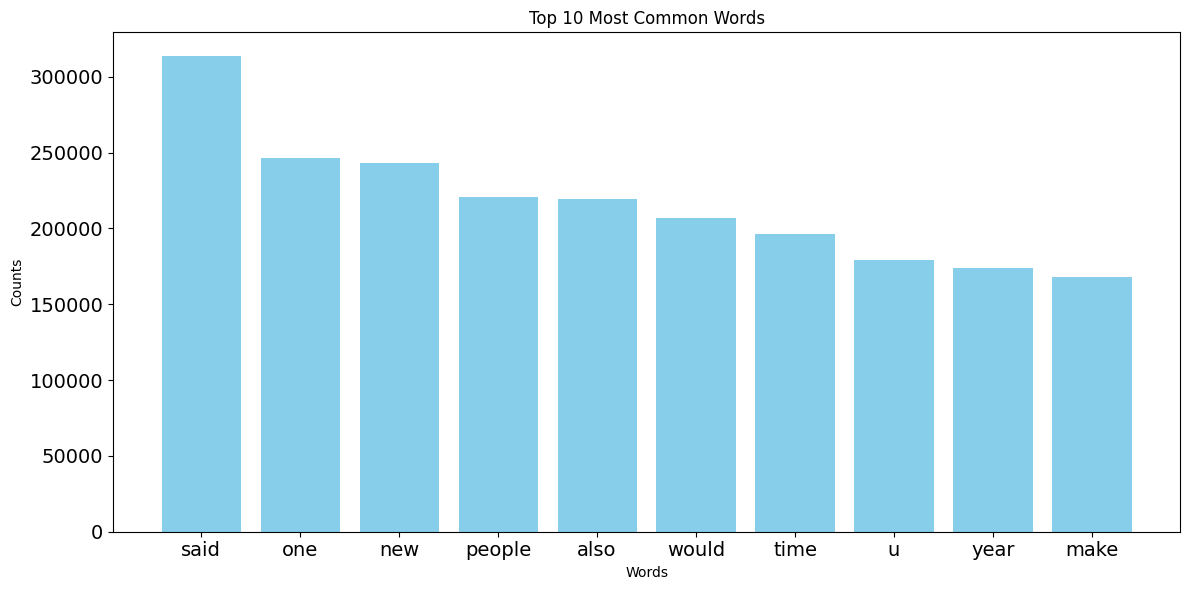

In [68]:
all_tokens = [token for tokens_list in df[df['source'] == 1]['lemmatized_text'] for token in tokens_list]

top_words = Counter(all_tokens).most_common(10)

words, counts = zip(*top_words)

plt.figure(figsize=(12,6))
plt.bar(words, counts, color='skyblue')
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
df.to_pickle('sentence.pkl')
#This was done once before. Do not run this cell just read the pkl file.

The following section is designated for machine learning models.

In [1]:
import pandas as pd
df = pd.read_pickle('pickles\sentence.pkl')
# read the preprocessed data file.

In [2]:
print(type(df['lemmatized_text'][0]))
print(df['lemmatized_text'][0])

<class 'list'>
['modi', 'promised', 'minimum', 'government', 'maximum', 'governance', 'expected', 'begin', 'difficult', 'job', 'reforming', 'state', 'take', 'year', 'get', 'justice', 'state', 'business', 'exit', 'psus', 'temple']


In [3]:
X = df['lemmatized_text']
y = df['source']

In [4]:
X = [' '.join(doc) for doc in X]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [6]:
print(len(X_train))
print(len(y_train))

279491
279491


In [10]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report 


In [8]:
pipelines = {
    'Naive Bayes': Pipeline([
        ('count_vectorizer', CountVectorizer()),
        ('tfidf_transformer', TfidfTransformer()),
        ('classifier', MultinomialNB())
    ]),

    'Logistic Regression': Pipeline([
        ('count_vectorizer', CountVectorizer()),
        ('tfidf_transformer', TfidfTransformer()),
        ('classifier', LogisticRegression(max_iter=1000))
    ]),

    'Passive Aggressive': Pipeline([
        ('count_vectorizer', CountVectorizer()),
        ('tfidf_transformer', TfidfTransformer()),
        ('classifier', PassiveAggressiveClassifier(max_iter=1000))
    ]),
    
    'Random Forest': Pipeline([
        ('count_vectorizer', CountVectorizer()),
        ('tfidf_transformer', TfidfTransformer()),
        ('classifier', RandomForestClassifier(n_estimators=100))
    ]),

    'XGBoost': Pipeline([
        ('count_vectorizer', CountVectorizer()),
        ('tfidf_transformer', TfidfTransformer()),
        ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
    ]),
}

In [15]:
nb_pipeline = pipelines['Naive Bayes']

nb_pipeline.fit(X_train, y_train)

nb_pred = nb_pipeline.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report 
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print(classification_report(y_test, nb_pred))

Naive Bayes Accuracy: 0.9550600257133793
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     59963
           1       0.92      1.00      0.96     59819

    accuracy                           0.96    119782
   macro avg       0.96      0.96      0.95    119782
weighted avg       0.96      0.96      0.95    119782



In [16]:
logreg_pipeline = pipelines['Logistic Regression']  
logreg_pipeline.fit(X_train, y_train)

logreg_pred = logreg_pipeline.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, logreg_pred))
print(classification_report(y_test, logreg_pred))

Logistic Regression Accuracy: 0.9872518408442003
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     59963
           1       0.99      0.99      0.99     59819

    accuracy                           0.99    119782
   macro avg       0.99      0.99      0.99    119782
weighted avg       0.99      0.99      0.99    119782



In [ ]:
pa_pipeline = pipelines['Passive Aggressive']
pa_pipeline.fit(X_train, y_train)

pa_pred = pa_pipeline.predict(X_test)

print("Passive Aggressive Accuracy:", accuracy_score(y_test, pa_pred))
print(classification_report(y_test, pa_pred))

Passive Aggressive Accuracy: 0.9877026598320282
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     59963
           1       0.99      0.99      0.99     59819

    accuracy                           0.99    119782
   macro avg       0.99      0.99      0.99    119782
weighted avg       0.99      0.99      0.99    119782



In [19]:
rf_pipeline = pipelines['Random Forest']
rf_pipeline.fit(X_train, y_train)

rf_pred = rf_pipeline.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

Random Forest Accuracy: 0.9779683090948557
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     59963
           1       0.99      0.97      0.98     59819

    accuracy                           0.98    119782
   macro avg       0.98      0.98      0.98    119782
weighted avg       0.98      0.98      0.98    119782



In [11]:
xgb_pipeline = pipelines['XGBoost']
xgb_pipeline.fit(X_train, y_train)

XGBClassifier(tree_method='gpu_hist', use_label_encoder=False, eval_metric='logloss')

xgb_pred = xgb_pipeline.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))

c:\Users\ammar\anaconda3\envs\tfenv\lib\site-packages\xgboost\core.py:158: UserWarning: [01:17:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9816166034963517
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     59963
           1       0.99      0.97      0.98     59819

    accuracy                           0.98    119782
   macro avg       0.98      0.98      0.98    119782
weighted avg       0.98      0.98      0.98    119782



The following section is designated for deep learning models.

In [2]:
print(type(df['lemmatized_text'][0]))
print(df['lemmatized_text'][0])

<class 'list'>
['modi', 'promised', 'minimum', 'government', 'maximum', 'governance', 'expected', 'begin', 'difficult', 'job', 'reforming', 'state', 'take', 'year', 'get', 'justice', 'state', 'business', 'exit', 'psus', 'temple']


In [12]:
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import TensorDataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Your tokenized texts are lists of words (strings)
texts = df['lemmatized_text'].tolist()  # List of lists of words

# Set the max vocabulary size (including OOV token)
max_vocab_size = 10000  # adjust as needed

# Create tokenizer and fit on your corpus with vocab limit
tokenizer = Tokenizer(num_words=max_vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)

# Convert texts to sequences of integer token IDs
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences to the same length (max length or specify maxlen)
max_len = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

# Now targets
y = df['source'].values

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, y, test_size=0.2, random_state=42)

# Convert to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.long)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

# Get vocab size for embedding layer (+1 because tokenizer num_words is exclusive)
vocab_size = max_vocab_size + 1
print(f"Vocabulary size for embedding: {vocab_size}")








Vocabulary size for embedding: 10001


In [33]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from transformers import RobertaModel, ElectraModel

# Global hyperparameters (adjust as needed)
vocab_size = 29500  # if you're using a tokenizer like in Keras
embed_dim = 100    
hidden_dim=64                        

class DNNModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_classes):
        super(DNNModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.global_avg_pool = lambda x: torch.mean(x, dim=1)  # GlobalAveragePooling1D
        self.fc1 = nn.Linear(embed_dim, 128)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 64)
        self.output = nn.Linear(64, num_classes)
        
    def forward(self, x):
        x = self.embedding(x)             # (batch, seq_len, embed_dim)
        x = self.global_avg_pool(x)       # (batch, embed_dim)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.output(x)
        return x




class BiLSTMModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim):
        super(BiLSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True, bidirectional=True)

        # Rename this to 'output' to match the evaluation function's check
        self.output = nn.Linear(2 * hidden_dim, output_dim) # RENAMED HERE

    def forward(self, x):
        x = self.embedding(x)
        _, (h_n, _) = self.lstm(x)
        x = torch.cat((h_n[-2, :, :], h_n[-1, :, :]), dim=1)
        x = self.output(x) # Use the new name here too
        return x


class CNNModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_classes):
        super(CNNModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.conv1d = nn.Conv1d(in_channels=embed_dim, out_channels=128, kernel_size=5)
        self.global_max_pool = nn.AdaptiveMaxPool1d(1)  # output size = 1
        self.fc1 = nn.Linear(128, 64)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(64, num_classes)

    def forward(self, x):
        x = self.embedding(x)  # shape: (batch, seq_len, embed_dim)
        x = x.permute(0, 2, 1) # conv1d expects (batch, channels, seq_len)
        x = torch.relu(self.conv1d(x))
        x = self.global_max_pool(x).squeeze(-1)  # shape: (batch, 128)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


class GRUModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, gru_hidden_dim, num_classes):
        super(GRUModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.gru = nn.GRU(embed_dim, gru_hidden_dim, batch_first=True) 
        self.fc1 = nn.Linear(gru_hidden_dim, 128)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 64)
        self.output = nn.Linear(64, num_classes)
        
    def forward(self, x):
        x = self.embedding(x)                 
        _, hn = self.gru(x)                   
        x = hn[-1]                            
        x = torch.relu(self.fc1(x))           
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))           
        x = self.output(x)                    
        return x
    
    




In [34]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve, auc
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelBinarizer

def evaluate_model(model, data_loader, device):
    model.eval()
    all_labels_list, all_preds_list, all_probs_raw_list = [], [], []

    num_classes = 0
    if hasattr(model, 'output'):
        num_classes = model.output.out_features
    elif hasattr(model, 'fc2'):
        num_classes = model.fc2.out_features
    elif hasattr(model, 'fc') and isinstance(model.fc, nn.Linear):
        num_classes = model.fc.out_features
    else:
        raise AttributeError("Could not determine num_classes from model's output layer (expected 'output', 'fc2', or 'fc').")

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            if labels.dim() == 2 and labels.size(1) == 1:
                labels = labels.squeeze(1)

            outputs = model(inputs)

            if num_classes > 1:
                probs = F.softmax(outputs, dim=1)
                all_probs_raw_list.extend(probs.cpu().numpy())
                
                _, preds = torch.max(outputs, 1)
                all_preds_list.extend(preds.cpu().numpy())
                all_labels_list.extend(labels.cpu().numpy())
            else: # Binary classification with a single output unit (if ever used)
                outputs_sigmoid = torch.sigmoid(outputs)
                probs = outputs_sigmoid.cpu().numpy()
                all_probs_raw_list.extend(probs.flatten()) # Ensure 1D for 1-output binary
                
                preds = (outputs_sigmoid >= 0.5).float().cpu().numpy()
                all_preds_list.extend(preds.flatten())
                all_labels_list.extend(labels.cpu().numpy().flatten())

    # Ensure all_labels is a 1D array of integer type
    all_labels = np.array(all_labels_list).flatten().astype(int) 
    all_preds = np.array(all_preds_list).flatten().astype(int)

    # Process all_probs_raw_list based on num_classes for metrics
    if num_classes == 2:
        all_probs_for_auc = np.array(all_probs_raw_list) # Will be (N, 2)
        if all_probs_for_auc.ndim == 2: # Take probabilities of the positive class
            all_probs_for_auc = all_probs_for_auc[:, 1]
        elif all_probs_for_auc.ndim == 1 and np.unique(all_labels).size == 2: # Already 1D sigmoid output
            pass # Keep as is
        else:
            print("Warning: Unexpected shape for all_probs_raw_list in binary evaluation. Reshaping to 1D.")
            all_probs_for_auc = all_probs_for_auc.flatten()
            
    elif num_classes > 2:
        all_probs_for_auc = np.array(all_probs_raw_list) # Will be (N, num_classes)
        # Ensure it's 2D if it's supposed to be multi-class probabilities
        if all_probs_for_auc.ndim == 1 and num_classes > 1: # if somehow flattened for multiclass
            print(f"Warning: all_probs_raw_list is 1D for multi-class {num_classes}. This is likely incorrect for AUC.")
            # This should ideally not happen if softmax output is extended directly.
            # If it does, there's a deeper issue in how all_probs_raw_list is collected.
            
    else: # num_classes is 1 or unexpected
        all_probs_for_auc = np.array(all_probs_raw_list).flatten() # Default to 1D if single class


    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='weighted', zero_division=0)
    recall = recall_score(all_labels, all_preds, average='weighted', zero_division=0)
    f1 = f1_score(all_labels, all_preds, average='weighted', zero_division=0)
    
    roc_auc = float('nan')
    if num_classes == 2:
        try:
            roc_auc = roc_auc_score(all_labels, all_probs_for_auc)
        except ValueError:
            roc_auc = 0.0
    elif num_classes > 2:
        # Check that all_probs_for_auc has the correct 2D shape for multi_class='ovr'
        if all_probs_for_auc.shape == (len(all_labels), num_classes):
            try:
                roc_auc = roc_auc_score(all_labels, all_probs_for_auc, multi_class='ovr', average='weighted')
            except ValueError:
                roc_auc = 0.0
        else:
            print(f"Warning: all_probs_for_auc shape {all_probs_for_auc.shape} mismatch with expected ({len(all_labels)}, {num_classes}) for multi-class AUC.")

    cm = confusion_matrix(all_labels, all_preds)

    print(f"Evaluation - Accuracy:  {accuracy:.4f}")
    print(f"Evaluation - Precision: {precision:.4f}")
    print(f"Evaluation - Recall:    {recall:.4f}")
    print(f"Evaluation - F1 Score:  {f1:.4f}")
    if not np.isnan(roc_auc):
        print(f"Evaluation - AUC-ROC:   {roc_auc:.4f}")
    else:
        print("Evaluation - AUC-ROC:   Not applicable or calculation failed for AUC-ROC.")

    # Return all_labels as int type, and all_probs_for_auc for plotting
    return all_labels, all_probs_for_auc, cm


def plot_confusion_matrix(cm, labels=None):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()


def plot_roc_curve(y_true, y_probs, num_classes, class_labels=None):
    # Ensure y_true is 1D and integer for roc_curve regardless of multi-class or binary
    y_true = np.array(y_true).flatten().astype(int)

    if num_classes == 2:
        # y_probs should be 1D for binary
        if y_probs.ndim > 1 and y_probs.shape[1] == 2:
            # If it's (N, 2), take the positive class probability
            y_probs = y_probs[:, 1]
        elif y_probs.ndim > 1 and y_probs.shape[1] == 1:
            y_probs = y_probs.flatten() # if it's (N, 1)

        fpr, tpr, _ = roc_curve(y_true, y_probs)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(6, 5))
        plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve")
        plt.legend(loc="lower right")
        plt.grid(True)
        plt.show()
    elif num_classes > 2:
        print("\nPlotting One-vs-Rest ROC Curves for multi-class.")
        plt.figure(figsize=(8, 7))
        
        lb = LabelBinarizer()
        y_true_bin = lb.fit_transform(y_true) # y_true is already 1D int
        
        # y_probs must be 2D (n_samples, n_classes) for multi-class OVR plotting
        if y_probs.ndim != 2 or y_probs.shape[1] != num_classes:
             print(f"Warning: y_probs shape {y_probs.shape} is not (n_samples, {num_classes}) for multi-class One-vs-Rest ROC plotting. Skipping.")
             return

        for i in range(num_classes):
            # Check if the class exists in y_true_bin (i.e., if there are samples for this class)
            if y_true_bin[:, i].sum() == 0 and y_probs[:, i].sum() == 0:
                continue

            try:
                fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_probs[:, i])
                class_roc_auc = auc(fpr, tpr)
            except ValueError as e:
                print(f"Could not plot ROC for class {i} ({class_labels[i] if class_labels else ''}): {e}")
                continue

            label_name = class_labels[i] if class_labels and i < len(class_labels) else f"Class {i}"
            plt.plot(fpr, tpr, label=f'{label_name} (AUC = {class_roc_auc:.2f})')

        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('One-vs-Rest ROC Curve')
        plt.legend(loc="lower right")
        plt.grid(True)
        plt.show()
    else:
        print(f"ROC Curve plotting is typically for binary or multi-class (One-vs-Rest). Your model has {num_classes} class(es).")


def train_model(model, train_loader, test_loader, device, model_name="Model", epochs=5):
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    train_losses, test_accuracies = [], []

    for epoch in range(epochs):
        model.train()
        epoch_loss = 0.0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)

            if labels.dim() == 2 and labels.size(1) == 1:
                labels = labels.squeeze(1)

            loss = criterion(outputs, labels)
            loss.backward()
            
            optimizer.step()

            epoch_loss += loss.item()

        train_losses.append(epoch_loss / len(train_loader))

        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                if labels.dim() == 2 and labels.size(1) == 1:
                    labels = labels.squeeze(1)

                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)

                correct += (predicted == labels).sum().item()
                total += labels.size(0)
        
        accuracy = correct / total
        test_accuracies.append(accuracy)
        print(f"{model_name} - Epoch {epoch+1}/{epochs}, Loss: {train_losses[-1]:.4f}, Accuracy: {accuracy:.4f}")

    print("\n--- Model Evaluation ---")
    
    num_classes = 0
    if hasattr(model, 'output'):
        num_classes = model.output.out_features
    elif hasattr(model, 'fc2'):
        num_classes = model.fc2.out_features
    elif hasattr(model, 'fc') and isinstance(model.fc, nn.Linear):
        num_classes = model.fc.out_features
    else:
        print("Warning: Could not determine num_classes from known output layer names. Defaulting to 2.")
        num_classes = 2

    class_labels = None
    if 'y_test' in globals() and y_test is not None:
        unique_labels = sorted(np.unique(y_test))
        class_labels = [str(int(label)) for label in unique_labels]
        if num_classes != len(unique_labels):
            print(f"Warning: Model's output_dim ({num_classes}) does not match number of unique labels in y_test ({len(unique_labels)}). Adjusting for plotting consistency.")
            # It's better to use model's actual num_classes for probability handling,
            # but for labels, use the actual number from data. Let's make sure `num_classes` used
            # for `plot_roc_curve` refers to the model's output features.
            # No, keep num_classes derived from model, and `class_labels` from `y_test`.
            pass # No change to num_classes derived from model here
    else:
        print("Warning: y_test not found or is None. Cannot determine class labels for plotting.")
        class_labels = [str(i) for i in range(num_classes)]

    try:
        actual_labels, predicted_probs, confusion_matrix_result = evaluate_model(model, test_loader, device)
        
        plot_confusion_matrix(confusion_matrix_result, labels=class_labels)

        plot_roc_curve(actual_labels, predicted_probs, num_classes=num_classes, class_labels=class_labels)

    except Exception as e:
        print(f"An error occurred during evaluation or plotting: {e}")

    return model, train_losses, test_accuracies

In [6]:
print(f"Max token in input: {X_train_tensor.max().item()}")
print(f"Vocab size: {vocab_size}")

Max token in input: 9999
Vocab size: 29500


In [7]:
print(torch.unique(y_train_tensor))
print(torch.unique(y_test_tensor))

tensor([0., 1.])
tensor([0., 1.])


In [35]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

TextCNN - Epoch 1/5, Loss: 0.0482, Accuracy: 0.9886
TextCNN - Epoch 2/5, Loss: 0.0234, Accuracy: 0.9915
TextCNN - Epoch 3/5, Loss: 0.0141, Accuracy: 0.9917
TextCNN - Epoch 4/5, Loss: 0.0097, Accuracy: 0.9912
TextCNN - Epoch 5/5, Loss: 0.0069, Accuracy: 0.9910

--- Model Evaluation ---
Evaluation - Accuracy:  0.9910
Evaluation - Precision: 0.9910
Evaluation - Recall:    0.9910
Evaluation - F1 Score:  0.9910
Evaluation - AUC-ROC:   0.9992


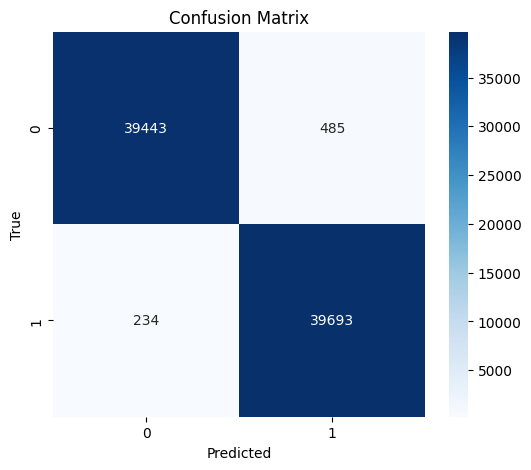

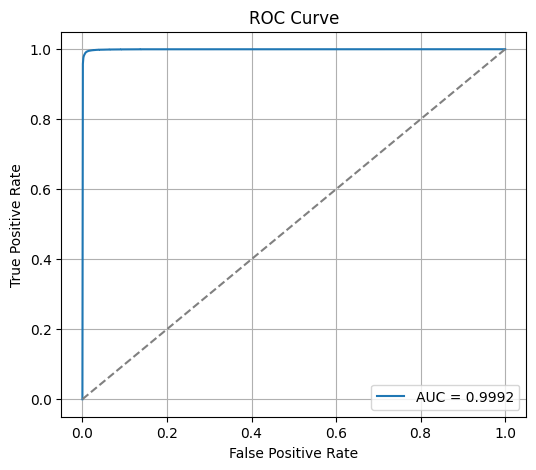

In [23]:
num_classes_CNN = len(np.unique(y))
# CNN
cnn_model = CNNModel(
    vocab_size=10000, 
    embed_dim=128,    
    num_classes=num_classes_CNN
).to(device)
trained_cnn, cnn_losses, cnn_accs = train_model(
    cnn_model,
    train_loader,
    test_loader,
    device,
    model_name="TextCNN", 
    epochs=5 
)

In [ ]:
torch.save(trained_cnn, "cnn_modelSENTENCE.pkl")

BI-LSTM - Epoch 1/5, Loss: 0.0445, Accuracy: 0.9911
BI-LSTM - Epoch 2/5, Loss: 0.0209, Accuracy: 0.9919
BI-LSTM - Epoch 3/5, Loss: 0.0134, Accuracy: 0.9925
BI-LSTM - Epoch 4/5, Loss: 0.0083, Accuracy: 0.9925
BI-LSTM - Epoch 5/5, Loss: 0.0051, Accuracy: 0.9924

--- Model Evaluation ---
Evaluation - Accuracy:  0.9924
Evaluation - Precision: 0.9925
Evaluation - Recall:    0.9924
Evaluation - F1 Score:  0.9924
Evaluation - AUC-ROC:   0.9996


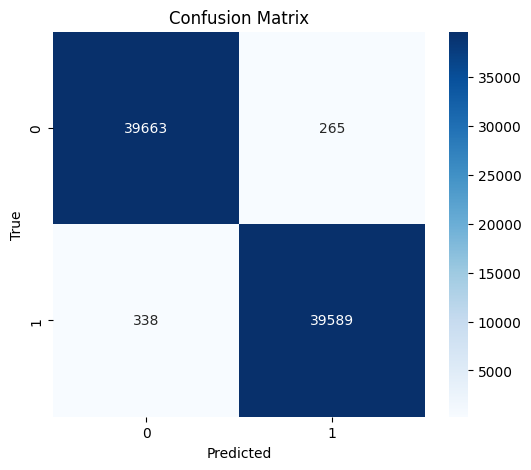

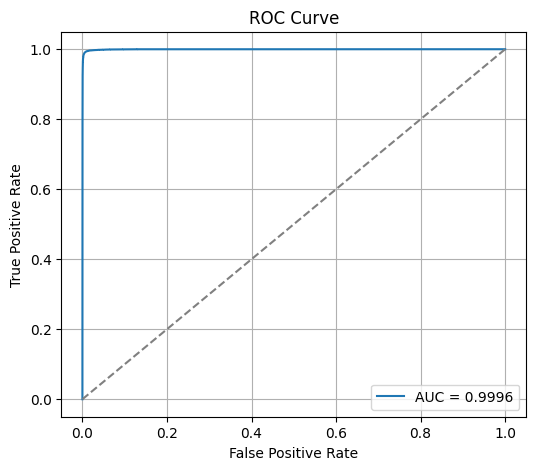

In [38]:
# Bi-LSTM
num_classes_BiLSTM = len(np.unique(y))
Bilstm_model = BiLSTMModel(
    vocab_size=10000,
    embed_dim=128,
    hidden_dim=64, 
    output_dim=num_classes_BiLSTM
).to(device)
trained_bilstm, losses, accs = train_model(Bilstm_model, train_loader, test_loader, device, model_name="BI-LSTM", epochs=5)


In [ ]:
torch.save(trained_bilstm, "bilstm_modelSENTENCE.pkl")

GRU - Epoch 1/5, Loss: 0.4136, Accuracy: 0.9888
GRU - Epoch 2/5, Loss: 0.0262, Accuracy: 0.9917
GRU - Epoch 3/5, Loss: 0.0150, Accuracy: 0.9914
GRU - Epoch 4/5, Loss: 0.0093, Accuracy: 0.9923
GRU - Epoch 5/5, Loss: 0.0066, Accuracy: 0.9921

--- Model Evaluation ---
Evaluation - Accuracy:  0.9921
Evaluation - Precision: 0.9921
Evaluation - Recall:    0.9921
Evaluation - F1 Score:  0.9921
Evaluation - AUC-ROC:   0.9996


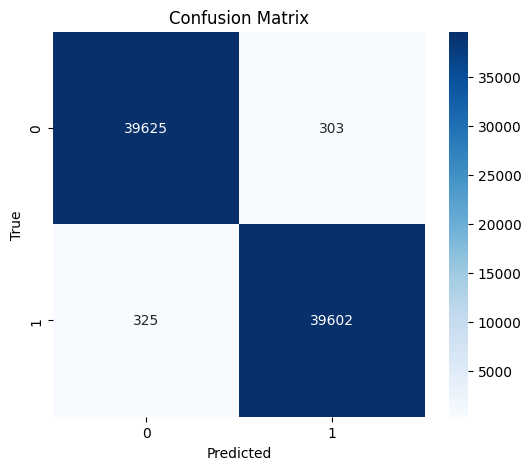

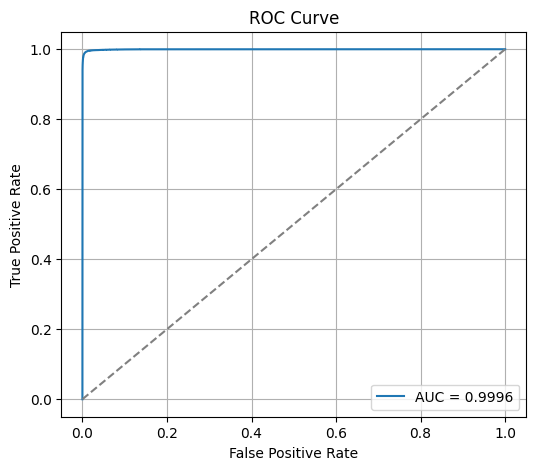

In [25]:
# GRU
num_classes_GRU = len(np.unique(y))
gru_model = GRUModel(
    vocab_size=10000, 
    embed_dim=128, 
    gru_hidden_dim=128, 
    num_classes=num_classes_GRU
).to(device)
trained_gru, losses, accs = train_model(gru_model, train_loader, test_loader, device, model_name="GRU", epochs=5)

In [ ]:
torch.save(trained_gru, "gru_modelSENTENCE.pkl")

DNN - Epoch 1/5, Loss: 0.1503, Accuracy: 0.9844
DNN - Epoch 2/5, Loss: 0.0640, Accuracy: 0.9877
DNN - Epoch 3/5, Loss: 0.0470, Accuracy: 0.9885
DNN - Epoch 4/5, Loss: 0.0378, Accuracy: 0.9907
DNN - Epoch 5/5, Loss: 0.0328, Accuracy: 0.9903

--- Model Evaluation ---
Evaluation - Accuracy:  0.9903
Evaluation - Precision: 0.9903
Evaluation - Recall:    0.9903
Evaluation - F1 Score:  0.9903
Evaluation - AUC-ROC:   0.9995


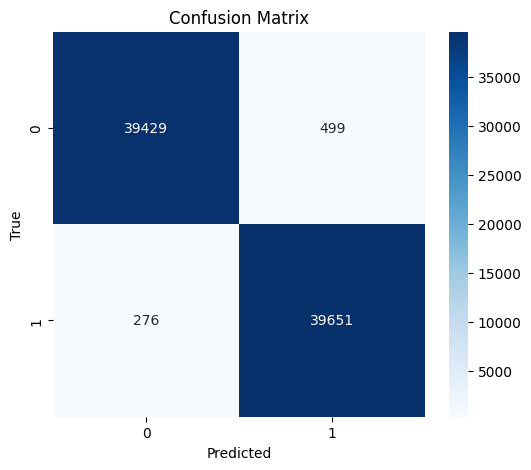

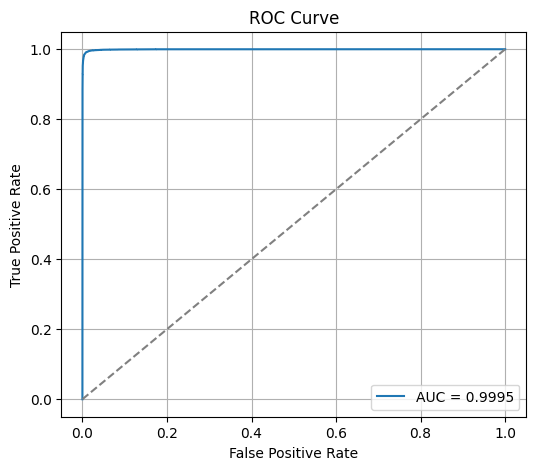

In [26]:
# DNN
num_classes_DNN = len(np.unique(y))
dnn_model = DNNModel(vocab_size=10000, 
    embed_dim=128,   
    num_classes=num_classes_DNN)
trained_dnn, losses, accs = train_model(dnn_model, train_loader, test_loader, device, model_name="DNN", epochs=5) 

In [ ]:
torch.save(trained_dnn, "dnn_modelSENTENCE.pkl")

In [2]:
df.head()

,text,source,tokenized_text,lemmatized_text
0,when modi promised minimum government maximum ...,0,"[modi, promised, minimum, government, maximum,...","[modi, promised, minimum, government, maximum,..."
1,talk all the nonsense and continue all the dra...,0,"[talk, nonsense, continue, drama, vote, modi]","[talk, nonsense, continue, drama, vote, modi]"
2,what did just say vote for modi welcome bjp to...,0,"[say, vote, modi, welcome, bjp, told, rahul, m...","[say, vote, modi, welcome, bjp, told, rahul, m..."
3,asking his supporters prefix chowkidar their n...,0,"[asking, supporters, prefix, chowkidar, names,...","[asking, supporter, prefix, chowkidar, name, m..."
4,answer who among these the most powerful world...,0,"[answer, among, powerful, world, leader, today...","[answer, among, powerful, world, leader, today..."


In [1]:
import pandas as pd
df = pd.read_pickle('pickles\sentence.pkl')
# read the preprocessed data file.

In [2]:
from transformers import (
    RobertaTokenizer,
    ElectraTokenizer
)

from TransformersTraining import build_roberta, build_electra, split_dataframe, train_Transformers
train_df, val_df, test_df = split_dataframe(df)

c:\Users\ammar\anaconda3\envs\tfenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
roberta = build_roberta()
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
train_Transformers(roberta, tokenizer, train_df, val_df,
      lr=2e-5, weight_decay=0.01, epochs=3, loss_check=1000)

c:\Users\ammar\anaconda3\envs\tfenv\lib\site-packages\huggingface_hub\file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
c:\Users\ammar\anaconda3\envs\tfenv\lib\site-packages\transformers\optimization.py:521: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Epoch 1:   1%|          | 200/17469 [01:12<5:08:46,  1.07s/it, loss=0.341]  


Saved checkpoint at iter 200: checkpoints_roberta\ckpt_iter200.pt


Epoch 1:   2%|▏         | 400/17469 [02:42<31:20:58,  6.61s/it, loss=0.00165]


Saved checkpoint at iter 400: checkpoints_roberta\ckpt_iter400.pt


Epoch 1:   3%|▎         | 600/17469 [04:18<38:26:18,  8.20s/it, loss=0.00233]


Saved checkpoint at iter 600: checkpoints_roberta\ckpt_iter600.pt


Epoch 1:   5%|▍         | 800/17469 [05:45<26:25:03,  5.71s/it, loss=0.00153] 


Saved checkpoint at iter 800: checkpoints_roberta\ckpt_iter800.pt


Epoch 1:   6%|▌         | 999/17469 [06:54<1:34:58,  2.89it/s, loss=0.0288]   


Saved checkpoint at iter 1000: checkpoints_roberta\ckpt_iter1000.pt


Epoch 1:   6%|▌         | 1000/17469 [08:24<124:41:40, 27.26s/it, loss=0.0288, avg_train_loss=0.0649, val_loss=0.0251]


Saved improved checkpoint: checkpoints_roberta\best_iter1000_val_0.0251.pt


Epoch 1:   7%|▋         | 1200/17469 [09:59<37:27:59,  8.29s/it, loss=0.0123]                                         


Saved checkpoint at iter 1200: checkpoints_roberta\ckpt_iter1200.pt


Epoch 1:   8%|▊         | 1400/17469 [11:53<58:53:24, 13.19s/it, loss=0.000277]


Saved checkpoint at iter 1400: checkpoints_roberta\ckpt_iter1400.pt


Epoch 1:   9%|▉         | 1600/17469 [13:39<50:35:01, 11.48s/it, loss=0.0048]  


Saved checkpoint at iter 1600: checkpoints_roberta\ckpt_iter1600.pt


Epoch 1:  10%|█         | 1800/17469 [15:07<25:31:01,  5.86s/it, loss=0.00267] 


Saved checkpoint at iter 1800: checkpoints_roberta\ckpt_iter1800.pt


Epoch 1:  11%|█▏        | 1999/17469 [16:16<1:29:51,  2.87it/s, loss=0.000899]


Saved checkpoint at iter 2000: checkpoints_roberta\ckpt_iter2000.pt


Epoch 1:  13%|█▎        | 2200/17469 [18:48<33:15:29,  7.84s/it, loss=0.00163]                                         


Saved checkpoint at iter 2200: checkpoints_roberta\ckpt_iter2200.pt


Epoch 1:  14%|█▎        | 2400/17469 [20:22<32:48:26,  7.84s/it, loss=0.000248]


Saved checkpoint at iter 2400: checkpoints_roberta\ckpt_iter2400.pt


Epoch 1:  15%|█▍        | 2600/17469 [21:36<7:37:51,  1.85s/it, loss=0.000129] 


Saved checkpoint at iter 2600: checkpoints_roberta\ckpt_iter2600.pt


Epoch 1:  16%|█▌        | 2800/17469 [23:02<21:23:04,  5.25s/it, loss=0.00469]


Saved checkpoint at iter 2800: checkpoints_roberta\ckpt_iter2800.pt


Epoch 1:  17%|█▋        | 2999/17469 [24:12<1:24:15,  2.86it/s, loss=0.000818] 


Saved checkpoint at iter 3000: checkpoints_roberta\ckpt_iter3000.pt


Epoch 1:  17%|█▋        | 3000/17469 [25:45<113:05:54, 28.14s/it, loss=0.000818, avg_train_loss=0.0173, val_loss=0.000677]


Saved improved checkpoint: checkpoints_roberta\best_iter3000_val_0.0007.pt


Epoch 1:  17%|█▋        | 3000/17469 [25:45<2:04:15,  1.94it/s, loss=0.000463]                                            



Stopping training by user request...
Saved loss curve at stop: checkpoints_roberta\loss_curve_stopped_iter3001.png


RuntimeError: [enforce fail at inline_container.cc:424] . unexpected pos 1219456128 vs 1219456016

c:\Users\ammar\anaconda3\envs\tfenv\lib\site-packages\huggingface_hub\file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
c:\Users\ammar\anaconda3\envs\tfenv\lib\site-packages\transformers\optimization.py:521: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Epoch 1:   1%|          | 200/17469 [01:18<6:39:17,  1.39s/it, loss=0.0331] 


Saved checkpoint at iter 200: checkpoints_electra\ckpt_iter200.pt


Epoch 1:   2%|▏         | 400/17469 [02:38<9:48:33,  2.07s/it, loss=0.00381] 


Saved checkpoint at iter 400: checkpoints_electra\ckpt_iter400.pt


Epoch 1:   3%|▎         | 600/17469 [03:55<4:31:19,  1.04it/s, loss=0.322]   


Saved checkpoint at iter 600: checkpoints_electra\ckpt_iter600.pt


Epoch 1:   5%|▍         | 800/17469 [05:17<9:53:39,  2.14s/it, loss=0.0745]  


Saved checkpoint at iter 800: checkpoints_electra\ckpt_iter800.pt


Epoch 1:   6%|▌         | 999/17469 [06:32<1:43:11,  2.66it/s, loss=0.00161] 


Saved checkpoint at iter 1000: checkpoints_electra\ckpt_iter1000.pt


Epoch 1:   6%|▌         | 1000/17469 [07:35<88:25:36, 19.33s/it, loss=0.00161, avg_train_loss=0.0658, val_loss=0.00259]


Saved improved checkpoint: checkpoints_electra\best_iter1000_val_0.0026.pt


Epoch 1:   7%|▋         | 1166/17469 [08:38<2:00:43,  2.25it/s, loss=0.00443]                                          



Stopping training by user request...
Saved loss curve at stop: checkpoints_electra\loss_curve_stopped_iter1167.png
Stopped by user. Saved last checkpoint: checkpoints_electra\last_iter1167.pt


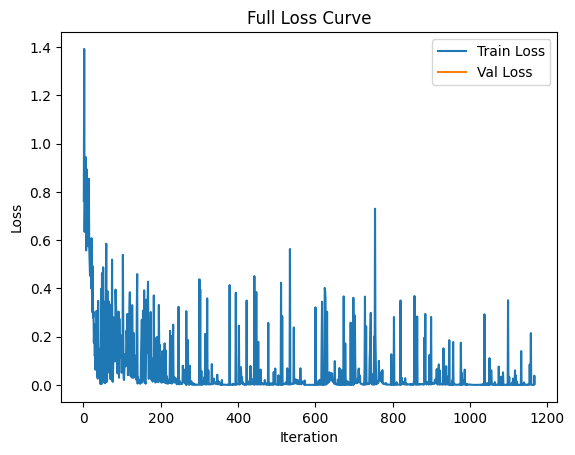

KeyboardInterrupt: 

In [3]:
electra = build_electra()
tokenizer = ElectraTokenizer.from_pretrained('google/electra-base-discriminator')
train_Transformers(electra, tokenizer, train_df, val_df,
      lr=2e-5, weight_decay=0.01, epochs=3, loss_check=1000)

In [ ]:
file_path = r"G:\College\semester 6\Foundation of Data Science\Project" 

pipeline_filename = 'sentences_passive_aggressive_pipeline.pkl'

full_output_path = os.path.join(file_path, pipeline_filename)

joblib.dump(pa_pipeline, full_output_path)

print(f"Pipeline saved to: {full_output_path}")

Pipeline saved to: G:\College\semester 6\Foundation of Data Science\Project\sentences_passive_aggressive_pipeline.pkl
